In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, f1_score

import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU only")


True
NVIDIA GeForce RTX 3070 Ti Laptop GPU


In [62]:
df1 = pd.read_csv('training_set_features.csv')
df2 = pd.read_csv('training_set_labels.csv')

df2


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [63]:
df_merged = df1.merge(df2, on='respondent_id', how='inner')

df_merged.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [64]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_merged):
    # Drop columns: 'respondent_id', 'health_insurance'
    df_merged = df_merged.drop(columns=['respondent_id', 'health_insurance'])
    return df_merged

df_merged_clean = clean_data(df_merged.copy())
df_merged_clean.head()
"""
Cell generated by Data Wrangler.
"""
import pandas as pd

def clean_data(df_merged_clean):
    # One-hot encode columns: 'age_group', 'education' and 10 other columns
    for column in ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']:
        insert_loc = df_merged_clean.columns.get_loc(column)
        df_merged_clean = pd.concat([df_merged_clean.iloc[:,:insert_loc], pd.get_dummies(df_merged_clean.loc[:, [column]], dummy_na=True), df_merged_clean.iloc[:,insert_loc+1:]], axis=1)
    return df_merged_clean

df_merged_clean_1 = clean_data(df_merged_clean.copy())
df_merged_clean_1.head()
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_merged_clean_1):
    # Drop columns: 'age_group_nan', 'age_group_18 - 34 Years' and 22 other columns
    df_merged_clean_1 = df_merged_clean_1.drop(columns=['age_group_nan', 'age_group_18 - 34 Years', 'education_nan', 'education_12 Years', 'race_nan', 'race_Black', 'sex_nan', 'sex_Female', 'income_poverty_nan', 'income_poverty_<= $75,000, Above Poverty', 'marital_status_nan', 'marital_status_Married', 'rent_or_own_nan', 'rent_or_own_Own', 'employment_status_nan', 'employment_status_Employed', 'hhs_geo_region_nan', 'hhs_geo_region_atmpeygn', 'census_msa_nan', 'census_msa_MSA, Not Principle  City', 'employment_industry_nan', 'household_adults', 'employment_occupation_bxpfxfdn', 'employment_occupation_nan'])
    return df_merged_clean_1

df_merged_clean_2 = clean_data(df_merged_clean_1.copy())
df_merged_clean_2.head()

"""
Cell generated by Data Wrangler.
"""
def clean_data(df_merged_clean_2):
    # Drop rows with missing data across all columns
    df_merged_clean_2 = df_merged_clean_2.dropna()
    return df_merged_clean_2

df_merged_clean_3 = clean_data(df_merged_clean_2.copy())
df_merged_clean_3.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,False,False,False,False,True,False,False,False,0,1
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,False,False,False,True,False,False,False,False,0,0


In [65]:
Y = df_merged_clean_3[['seasonal_vaccine', 'h1n1_vaccine']]
X = df_merged_clean_3.drop(['seasonal_vaccine', 'h1n1_vaccine'], axis=1)

X = X.apply(pd.to_numeric, errors="coerce").fillna(0).astype(np.float32)
Y = Y.astype(np.float32)

X_train, X_test, Y_train, Y_test = train_test_split(
    X.values, Y.values, test_size=0.2, random_state=42
)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

In [66]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_layers, activation, output_dim):
        super().__init__()
        layers = []
        in_dim = input_dim

        for h in hidden_layers:
            layers.append(nn.Linear(in_dim, h))
            if activation == "relu":
                layers.append(nn.ReLU())
            elif activation == "tanh":
                layers.append(nn.Tanh())
            in_dim = h

        layers.append(nn.Linear(in_dim, output_dim))
        layers.append(nn.Sigmoid()) 

        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


In [67]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

param_grid = {
    "hidden_layers": [
    (64,), (128,), (256,), (512,),
    (64, 32), (128, 64), (256, 128), (512, 256),
    (128, 64, 32), (256, 128, 64), (512, 256, 128),
    (64, 64), (128, 128), (256, 256)
    ],
    "activation": ["relu", "tanh", "sigmoid"],
    "lr": [0.0001, 0.0005, 0.001, 0.005, 0.01],
    "batch_size": [32, 64, 128, 256],
    "epochs": [100, 200, 500, 1000],
    "weight_decay": [0.0, 0.0001, 0.001, 0.01]
}

best_f1 = 0
best_params = None
best_model = None

def train_and_evaluate(params):
    model = MLP(
        input_dim=X_train.shape[1],
        hidden_layers=params["hidden_layers"],
        activation=params["activation"],
        output_dim=Y_train.shape[1],
    ).to(device)

    optimizer = optim.Adam(
        model.parameters(),
        lr=params["lr"],
        weight_decay=params["weight_decay"],
    )
    criterion = nn.BCELoss()

    X_t = torch.tensor(X_train, dtype=torch.float32).to(device)
    Y_t = torch.tensor(Y_train, dtype=torch.float32).to(device)
    X_val = torch.tensor(X_test, dtype=torch.float32).to(device)
    Y_val = torch.tensor(Y_test, dtype=torch.float32).to(device)


    for epoch in range(500):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_t)
        loss = criterion(outputs, Y_t)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        preds = model(X_val).cpu().numpy()
    preds_bin = (preds > 0.5).astype(int)
    f1 = f1_score(Y_test, preds_bin, average="macro")
    return f1, model

for hidden_layers in param_grid["hidden_layers"]:
    for activation in param_grid["activation"]:
        for lr in param_grid["lr"]:
            for wd in param_grid["weight_decay"]:
                params = {
                    "hidden_layers": hidden_layers,
                    "activation": activation,
                    "lr": lr,
                    "weight_decay": wd,
                }
                f1, model = train_and_evaluate(params)
                print(f"{params} → F1 = {f1:.4f}")

                if f1 > best_f1:
                    best_f1 = f1
                    best_params = params
                    best_model = model

print("\nBest param:", best_params)
print(f"F1: {best_f1:.4f}")


Device: cuda
{'hidden_layers': (64,), 'activation': 'relu', 'lr': 0.0001, 'weight_decay': 0.0} → F1 = 0.4440
{'hidden_layers': (64,), 'activation': 'relu', 'lr': 0.0001, 'weight_decay': 0.0001} → F1 = 0.4424
{'hidden_layers': (64,), 'activation': 'relu', 'lr': 0.0001, 'weight_decay': 0.001} → F1 = 0.4437
{'hidden_layers': (64,), 'activation': 'relu', 'lr': 0.0001, 'weight_decay': 0.01} → F1 = 0.3669
{'hidden_layers': (64,), 'activation': 'relu', 'lr': 0.0005, 'weight_decay': 0.0} → F1 = 0.6444
{'hidden_layers': (64,), 'activation': 'relu', 'lr': 0.0005, 'weight_decay': 0.0001} → F1 = 0.6507
{'hidden_layers': (64,), 'activation': 'relu', 'lr': 0.0005, 'weight_decay': 0.001} → F1 = 0.6516
{'hidden_layers': (64,), 'activation': 'relu', 'lr': 0.0005, 'weight_decay': 0.01} → F1 = 0.5985
{'hidden_layers': (64,), 'activation': 'relu', 'lr': 0.001, 'weight_decay': 0.0} → F1 = 0.6654
{'hidden_layers': (64,), 'activation': 'relu', 'lr': 0.001, 'weight_decay': 0.0001} → F1 = 0.6709
{'hidden_layer

In [68]:
X_all = torch.tensor(X.values, dtype=torch.float32).to(device)
Y_all = torch.tensor(Y.values, dtype=torch.float32).to(device)

final_model = MLP(
    input_dim=X.shape[1],
    hidden_layers=best_params["hidden_layers"],
    activation=best_params["activation"],
    output_dim=Y.shape[1],
).to(device)

optimizer = optim.Adam(final_model.parameters(),
                       lr=best_params["lr"],
                       weight_decay=best_params["weight_decay"])
criterion = nn.BCELoss()

epochs = 500
for epoch in range(epochs):
    final_model.train()
    optimizer.zero_grad()
    outputs = final_model(X_all)
    loss = criterion(outputs, Y_all)
    loss.backward()
    optimizer.step()


In [69]:
optimizer = optim.Adam(final_model.parameters(),
                       lr=best_params["lr"] / 10,
                       weight_decay=best_params["weight_decay"])

fine_tune_epochs = 500
for epoch in range(fine_tune_epochs):
    final_model.train()
    optimizer.zero_grad()
    outputs = final_model(X_all)
    loss = criterion(outputs, Y_all)
    loss.backward()
    optimizer.step()


F1-macro: 0.6848


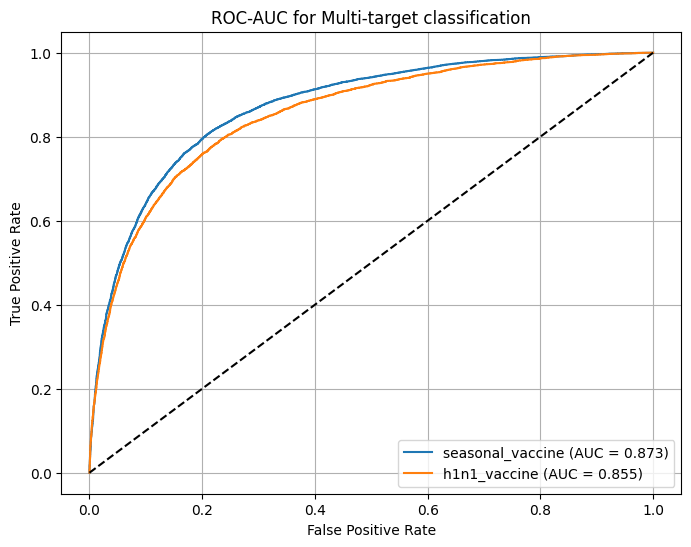

In [70]:
X_tensor = torch.tensor(X.values, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y.values, dtype=torch.float32).to(device)

final_model.eval()
with torch.no_grad():
    preds = final_model(X_tensor).cpu().numpy()

preds_bin = (preds > 0.5).astype(int)

f1 = f1_score(Y, preds_bin, average="macro")
print(f"F1-macro: {f1:.4f}")



plt.figure(figsize=(8,6))
for i, col in enumerate(Y.columns):
    fpr, tpr, _ = roc_curve(Y[col], preds[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{col} (AUC = {roc_auc:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC for Multi-target classification")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [71]:
def feature_importance_analysis(model, X_data, feature_names):

    model.eval()
    X_tensor = torch.tensor(X_data, dtype=torch.float32).to(device)
    
    X_tensor.requires_grad = True
    
    outputs = model(X_tensor)

    target = outputs[:, 0] if outputs.shape[1] > 1 else outputs.squeeze()
    
    model.zero_grad()
    target.sum().backward()
    
    feature_importance = torch.abs(X_tensor.grad).mean(dim=0).cpu().numpy()
    
    indices = np.argsort(feature_importance)[::-1]
    
    
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.bar(range(20), feature_importance[indices[:20]])
    plt.title('TOP-20 features')
    plt.xticks(range(20), [feature_names[i] for i in indices[:20]], rotation=45, ha='right')
    plt.ylabel('Importance (absolute gradient)')
    
    plt.subplot(1, 2, 2)
    plt.plot(np.sort(feature_importance)[::-1])
    plt.title('Distribution of the importance of features')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return feature_importance, indices

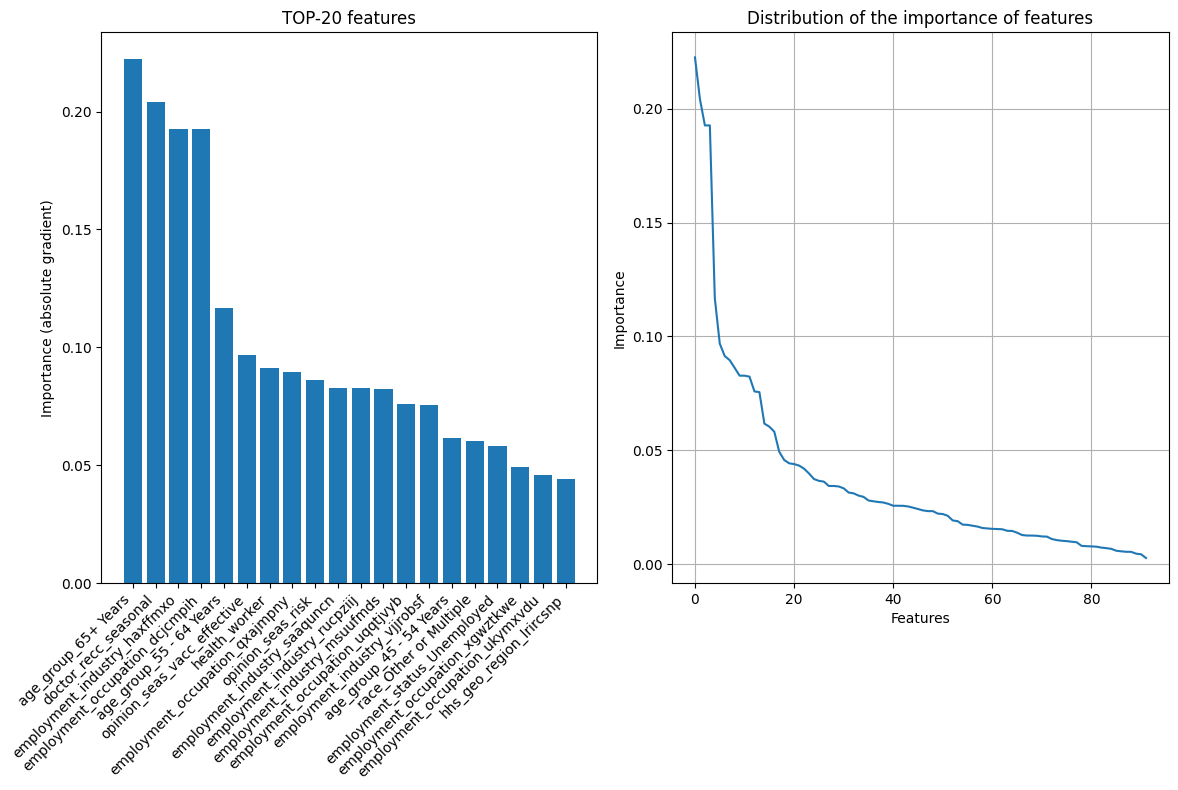

In [72]:
feature_importance, indices = feature_importance_analysis(final_model, X.values, feature_names=X.columns[:-1])



plt.show()